<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/05_Linear_Classifiers_in_Python/03_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [14]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ds-labs/main/34_Unsupervised_Learning_in_Python/dataset/Grains/seeds-width-vs-length.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
grains = pd.read_csv(url, header=None)
display(grains.head())

,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


**Regularized logistic regression**   
In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in the variables X_train, y_train, X_valid, and y_valid. The variables train_errs and valid_errs are already initialized as empty lists.

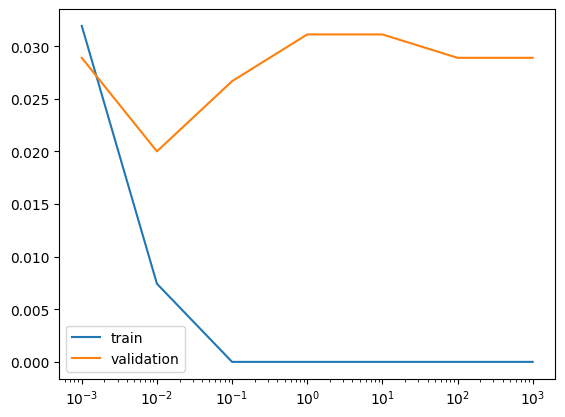

In [15]:
from sklearn import datasets
digits = datasets.load_digits()
X, y =  digits.data, digits.target
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)


# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, max_iter=1000)
    lr.fit(X_train, y_train)

    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )

# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

# As you can see, too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting.

**Logistic regression and feature selection**    
In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in X_train and y_train.

We'll search for the best value of C using scikit-learn's GridSearchCV(), which was covered in the prerequisite course.

In [16]:
# Specify L1 regularization
lr = LogisticRegression(solver='liblinear', penalty="l1")

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

# As you can see, a whole lot of features were discarded here.

Best CV params {'C': 0.1}
Total number of features: 640
Number of selected features: 245


**Identifying the most positive and negative words**  
In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable lr.

In addition, the words corresponding to the different features are loaded into the variable vocab. For example, since vocab[100] is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

In [17]:
# Get the indices of the sorted cofficients
vocab  = ['the', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'he', 'are', 'his', 'have', 'be', 'one', '!', 'all', 'at', 'by', 'an', 'who', 'they', 'from', 'so', 'like', 'there', 'her', 'or', 'just', 'about', 'if', 'has', 'out', 'what', '?', 'some', 'good', 'more', 'when', 'she', 'very', 'even', 'my', 'no', 'up', 'time', 'would', 'which', 'only', 'story', 'really', 'their', 'see', 'had', 'can', 'were', 'me', 'we', 'than', 'well', 'much', 'been', 'get', 'people', 'will', 'bad', 'other', 'also', 'into', 'do', 'because', 'great', 'first', 'how', 'him', 'most', "don't", 'its', 'made', 'then', 'them', 'way', 'make', 'could', 'too', 'any', 'after', 'movies', 'think', 'characters', 'character', 'watch', 'films', 'two', 'many', 'seen', 'being', 'acting', 'never', 'plot', 'little', 'where', 'love', 'best', 'life', 'did', 'show', 'know', 'does', 'ever', 'here', 'better', 'man', 'your', 'still', 'end', 'over', 'off', 'these', 'say', 'scene', 'why', 'while', 'scenes', 'such', 'go', 'something', 'should', 'through', 'back', "i'm", 'those', 'watching', 'real', 'though', 'now', "doesn't", 'thing', 'years', 'actors', 'director', 'another', "didn't", 'before', 'nothing', 'new', 'funny', 'actually', 'work', 'makes', 'find', 'look', 'old', 'few', 'going', 'same', 'again', 'lot', 'part', 'every', 'cast', 'us', 'world', 'quite', 'want', 'things', 'pretty', 'young', 'seems', 'around', 'got', 'down', 'however', "can't", 'fact', 'horror', 'take', 'enough', 'both', 'may', 'give', 'original', 'between', 'big', 'own', "i've", 'thought', 'series', 'without', 'right', 'times', 'long', 'always', 'gets', 'action', 'comedy', "isn't", 'family', 'come', 'point', 'role', 'saw', 'interesting', 'almost', 'least', 'whole', 'must', 'bit', 'music', 'script', 'done', 'guy', 'anything', 'minutes', 'last', 'since', 'might', 'performance', 'far', 'feel', 'probably', 'am', 'woman', 'kind', 'girl', 'away', 'yet', 'rather', 'worst', 'sure', 'fun', 'anyone', 'making', 'each', 'played', 'tv', 'found', 'having', 'day', 'although', 'especially', 'our', 'course', 'believe', 'comes', 'trying', 'goes', 'hard', 'looks', 'different', 'place', 'book', 'actor', 'put', 'maybe', 'money', 'someone', 'ending', 'reason', 'let', 'everything', "wasn't", 'sense', 'once', 'shows', 'screen', 'dvd', 'true', 'set', 'worth', 'job', 'main', 'looking', 'watched', 'everyone', 'together', 'three', 'plays', 'john', 'later', 'said', 'play', 'instead', 'audience', 'seem', 'beautiful', 'takes', 'effects', 'himself', 'version', 'during', 'left', 'night', 'house', 'seeing', 'wife', 'special', 'excellent', 'father', 'american', 'idea', 'else', 'nice', 'shot', 'simply', 'year', 'read', "you're", 'black', 'high', 'less', 'war', 'star', 'completely', 'help', 'fan', 'poor', 'death', 'second', 'men', 'hollywood', 'either', 'mind', 'used', 'given', 'home', 'kids', 'try', 'performances', 'women', 'enjoy', 'classic', 'boring', 'short', 'wrong', 'need', 'rest', 'use', 'friends', 'until', 'along', 'dead', 'truly', 'half', 'production', 'line', 'tell', 'couple', 'remember', 'next', 'start', 'stupid', 'perhaps', 'came', 'recommend', 'moments', 'awful', 'wonderful', 'episode', 'mean', 'understand', 'terrible', 'full', 'camera', 'getting', 'stars', 'playing', 'video', 'keep', 'sex', 'doing', 'others', 'early', 'often', 'small', 'definitely', 'gives', 'person', 'school', 'face', 'perfect', 'name', 'itself', 'become', 'human', 'lines', 'yes', 'finally', 'dialogue', 'lost', 'felt', 'case', 'piece', 'top', 'liked', 'supposed', 'children', "couldn't", 'title', 'absolutely', 'head', 'budget', 'mother', 'live', 'written', 'boy', 'picture', 'against', 'cinema', 'went', 'worse', 'certainly', 'entire', 'sort', 'style', 'waste', 'problem', 'mr', 'hope', 'entertaining', 'overall', 'friend', 'killer', 'evil', 'several', 'loved', 'fans', 'oh', 'beginning', 'white', 'lives', 'care', 'becomes', 'direction', 'example', 'already', 'based', 'drama', 'despite', 'seemed', 'dark', 'throughout', 'unfortunately', 'wanted', "i'd", 'final', 'history', 'amazing', 'turn', 'fine', 'laugh', 'michael', 'son', 'humor', 'guess', 'totally', 'lead', 'sound', 'guys', 'writing', "you'll", 'wants', 'low', 'works', 'tries', 'called', 'under', 'past', 'viewer', 'quality', 'child', 'days', 'behind', 'game', 'turns', "they're", 'enjoyed', 'today', 'able', 'act', 'town', 'favorite', 'kill', 'flick', 'starts', 'gave', 'actress', 'sometimes', 'eyes', 'etc', 'side', 'horrible', 'girls', 'genre', 'soon', "won't", 'car', 'brilliant', 'parts', 'art', 'heart', 'themselves', 'expect', 'kid', 'stuff', 'stories', 'thinking', 'city', 'obviously', 'directed', 'late', 'myself', 'blood', 'decent', 'feeling', 'run', 's', 'highly', 'god', 'except', 'close', 'fight', 'hand', 'anyway', 'roles', 'daughter', 'killed', 'moment', 'says', 'heard', 'leave', 'matter', 'took', 'cannot', 'police', 'happens', 'brother', 'hour', 'violence', 'happened', 'strong', 'particularly', 'james', 'extremely', 'involved', 'chance', 'writer', 'obvious', 'experience', "wouldn't", 'lack', 'including', 'told', 'alone', 'attempt', 'murder', 'living', 'happen', 'please', 'age', 'wonder', 'complete', 'ago', 'voice', 'group', 'score', 'david', 'coming', 'interest', 'save', 'none', 'ok', 'crap', 'type', 'looked', 'simple', 'slow', 'possible', 'number', 'seriously', 'hell', 'gore', 'exactly', 'shown', 'king', 'hero', 'annoying', 'song', 'husband', 'sad', 'whose', 'career', 'yourself', 'cinematography', 'taken', 'musical', 'ends', 'usually', 'serious', "i'll", 'stop', 'hours', 'scary', 'released', 'across', 'hilarious', 'running', 'reality', 'relationship', 'usual', 'ridiculous', 'known', 'hit', 'opening', 'somewhat', 'started', 'opinion', 'jokes', 'novel', 'cool', 'change', 'robert', 'wish', 'ones', 'body', 'finds', 'order', 'saying', 'english', 'huge', 'cut', 'shots', 'episodes', 'mostly', 'taking', 'female', 'talking', 'strange', 'major', 'view', 'power', 'happy', 'documentary', 'apparently', 'rating', 'disappointed', 'level', 'talent', 'call', 'country', 'jack', 'due', 'events', 'room', 'important', 'songs', 'basically', 'clearly', 'knows', 'knew', 'supporting', 'attention', 'television', 'future', 'turned', 'paul', 'easily', 'problems', "aren't", 'silly', 'british', 'word', 'tells', 'earth', 'words', 'local', 'single', 'light', 'four', 'cheap', 'sequence', 'bring', 'entertainment', 'thriller', 'beyond', 'george', 'miss', 'modern', 'whether', 'b', 'predictable', 'falls', 'five', 'sets', 'similar', 'review', 'richard', 'needs', 'upon', 'lady', 'enjoyable', 'appears', 'romantic', 'comic', 'giving', 'mystery', 'talk', 'rock', 'message', 'animation', 'within', 'theater', 'sequel', 'bunch', 'mention', 'herself', 'feels', 'nearly', 'points', 'theme', 'lee', 'above', 'dull', 'add', 'york', 'ways', 'moving', 'storyline', 'ten', 'surprised', "haven't", 'lots', 'team', 'begins', 'middle', 'using', 'fantastic', 'actual', 'sister', 'effort', 'viewers', 'named', 'among', 'elements', 'easy', 'stay', 'tom', 'comments', 'avoid', 'showing', 'typical', 'release', 'clear', 'hate', 'tried', 'peter', 'sorry', 'french', 'dialog', 'editing', 'tale', 'certain', 'season', 'soundtrack', 'buy', 'fall', 'general', 'near', 'means', 'famous', 'check', 'parents', 'red', 'somehow', 'material', 'oscar', 'period', 'form', 'straight', 'weak', 'working', 'doubt', 'class', 'leads', 'filmed', 'gone', 'kept', 'greatest', 'figure', 'viewing', 'feature', 'disney', 'eye', 'realistic', 'brought', 'imagine', 'hear', 'atmosphere', 'fast', 'particular', 'suspense', 'lame', 'move', 'whatever', 'sequences', 'america', 'follow', 'indeed', 'die', 'crime', 'learn', 'eventually', 'reviews', 'wait', 'forget', 'deal', 'zombie', 'dance', 'space', 'okay', 'premise', 'surprise', 'believable', 'nature', 'possibly', "you've", 'third', 'decided', 'subject', 'expected', 'de', 'japanese', 'dr', 'became', 'truth', 'imdb', 'sexual', 'average', 'stand', 'difficult', 'screenplay', 'romance', 't', 'sit', 'poorly', 'rent', 'joe', 'nor', 'leaves', 'question', 'stage', 'note', 'begin', 'killing', 'needed', 'reading', 'unless', 'baby', 'superb', 'directors', 'society', 'otherwise', 'shame', 'meet', 'street', 'situation', 'meets', 'memorable', 'dog', 'credits', 'earlier', 'forced', 'weird', 'minute', 'older', 'laughs', 'realize', 'emotional', 'jane', 'beauty', 'writers', 'comment', 'footage', 'write', 'ask', 'badly', 'interested', 'dramatic', 'sounds', 'whom', 'hot', 'keeps', 'features', 'directing', 'mess', 'development', 'crazy', 'quickly', 'male', 'mark', 'towards', 'creepy', 'free', 'monster', 'perfectly', 'result', 'total', 'plus', 'previous', 'brings', 'unique', 'plenty', 'worked', 'cheesy', 'effect', 'personal', 'incredibly', 'hands', 'bill', 'fantasy', 'return', 'dream', 'apart', 'deep', 'setting', 'admit', 'open', 'appear', 'background', 'christmas', 'leading', 'doctor', 'casting', 'hardly', 'meant', 'ben', 'potential', 'boys', 'powerful', 'business', 'masterpiece', 'fails', 'battle', 'joke', 'create', 'various', 'forward', 'fire', 'inside', 'outside', 'portrayed', 'girlfriend', 'ideas', 'twist', 'william', 'missing', 'nudity', 'reasons', 'villain', 'dumb', 'political', 'deserves', 'match', 'secret', 'expecting', 'air', 'fairly', 'present', 'gay', 'fighting', 'unlike', 'married', 'manages', 'break', 'scott', 'success', 'attempts', 'western', 'spoilers', 'acted', 'remake', 'pay', 'box', 'recently', 'rich', 'front', 'cute', 'further', 'cop', 'sadly', 'era', 'copy', 'agree', 'talented', 'telling', 'sci-fi', 'filmmakers', 'following', 'public', 'crew', 'incredible', 'missed', 'wasted', 'pure', 'plain', 'brothers', 'odd', 'caught', 'flat', 'social', 'mentioned', 'pace', 'ended', 'decides', 'considering', 'waiting', 'members', 'mary', 'large', 'list', 'sweet', 'revenge', 'popular', 'uses', 'hold', 'slightly', 'office', 'compared', 'neither', 'wrote', 'escape', 'sees', 'suddenly', 'e', 'party', 'spirit', 'tension', 'convincing', 'created', 'fear', 'spent', 'rate', 'cause', 'entirely', 'island', 'cartoon', 'intelligent', 'credit', 'clever', "we're", 'choice', 'water', 'kills', 'bored', 'familiar', 'moves', 'tony', 'laughing', 'gun', 'visual', 'successful', 'ultimately', 'basic', 'band', 'trouble', 'la', 'cat', 'zombies', 'concept', 'value', 'biggest', 'positive', 'singing', 'consider', 'exciting', 'dancing', 'company', 'died', 'recent', 'state', 'language', 'effective', 'science', 'cover', 'spend', 'portrayal', 'violent', 'cold', 'appreciate', 'produced', 'speak', 'pointless', 'former', 'studio', 'amusing', 'adult', 'common', 'filled', 'planet', 'younger', 'books', 'store', 'walk', 'follows', 'focus', 'solid', 'bizarre', 'italian', 'impressive', 'animated', 'impossible', 'german', 'amount', 'tone', 'century', 'adventure', 'conclusion', 'producers', "weren't", 'showed', 'recommended', 'fit', 'van', 'depth', 'runs', 'situations', 'chemistry', 'prison', 'project', 'jim', 'respect', 'awesome', 'control', 'accent', 'hair', 'considered', 'win', 'won', 'smith', 'force', 'decide', 'college', 'trip', 'disturbing', 'somewhere', 'mad', 'failed', 'dad', 'changed', 'leaving', 'questions', 'longer', 'steve', 'audiences', 'barely', 'aside', 'honest', 'slasher', 'sick', 'ghost', 'shooting', 'trash', 'images', 'thanks', 'charming', 'starring', 'generally', 'pathetic', 'literally', 'west', 'values', 'culture', 'likes', 'fake', 'surprisingly', 'touch', 'magic', 'involving', 'yeah', 'alive', 'immediately', 'stewart', 'harry', 'south', 'frank', 'garbage', 'natural', 'utterly', 'camp', 'bought', 'honestly', 'adaptation', 'sam', 'london', 'aspect', 'pictures', 'ability', 'detective', 'nobody', 'glad', 'explain', 'fair', 'computer', 'appearance', 'genius', 'sitting', 'cult', 'attack', 'master', 'meaning', 'personally', 'stick', 'normal', 'u', 'army', 'appeal', 'knowing', 'tough', 'remains', 'humour', 'military', 'nowhere', 'journey', 'added', 'charlie', 'rare', 'thinks', 'thank', 'dreams', 'c', 'purpose', 'touching', 'unbelievable', 'comedies', 'week', 'catch', 'taste', 'terms', 'chase', 'beautifully', 'channel', 'walking', 'sexy', 'batman', 'terrific', 'twists', 'silent', 'fiction', 'kelly', 'wow', 'standard', 'equally', 'naked', 'mood', 'subtle', 'mistake', 'managed', 'complex', 'laughable', 'pick', 'themes', 'road', 'chris', 'lovely', 'narrative', 'wild', 'disappointing', 'likely', 'brain', 'costumes', 'thus', 'plan', 'issues', 'excuse', 'club', 'outstanding', 'soldiers', 'painful', 'producer', 'date', 'justice', 'surely', 'constantly', 'christopher', 'government', 'fully', 'self', 'edge', 'law', 'boss', 'presented', 'victim', 'cinematic', 'contains', 'door', 'places', 'central', 'details', 'innocent', 'presence', 'climax', 'everybody', 'slowly', 'marriage', 'besides', 'pass', 'ride', 'manner', 'charles', 'hoping', 'animals', 'historical', 'charm', 'stunning', 'finish', 'vampire', 'd', 'photography', 'impression', "you'd", 'henry', 'loves', 'gang', 'spoiler', 'thrown', 'mysterious', 'disappointment', 'expectations', 'bottom', 'hey', 'shoot', 'allen', 'exception', 'paris', 'woods', 'minor', 'makers', 'soul', 'festival', 'critics', 'aspects', 'stands', 'loud', 'indian', 'suppose', 'scenery', 'train', 'bother', 'cry', 'church', 'color', 'feelings', 'sent', 'heavy', 'support', 'emotion', 'bruce', 'opportunity', 'award', 'hotel', 'brief', 'element', 'filming', 'mainly', 'ahead', 'fascinating', 'forever', 'blue', 'rated', 'acts', 'pieces', 'emotions', 'available', 'intended', 'twice', 'dies', 'building', 'names', 'throw', 'track', 'compelling', 'serial', 'happening', 'changes', 'drawn', 'hurt', 'don', 'puts', 'green', 'falling', 'student', 'smart', 'jerry', 'likable', 'offer', 'speaking', 'tired', 'suggest', 'include', 'bed', 'pain', 'difference', 'victims', 'confused', 'adults', 'lover', 'followed', 'impact', 'f', 'billy', 'arthur', 'approach', 'giant', 'motion', "hasn't", 'appeared', 'boyfriend', 'page', 'developed', 'bar', 'image', 'park', 'jones', 'gorgeous', 'actresses', 'confusing', 'trailer', 'laughed', 'notice', 'system', 'summer', 'share', 'lacks', 'fresh', 'numbers', 'alien', 'fellow', 'event', 'grade', 'supposedly', 'flaws', 'martin', 'murders', 'moral', 'zero', 'content', 'noir', 'million', 'al', 'opera', 'mom', 'gem', 'ii', 'relationships', 'tragedy', 'answer', 'mediocre', 'helps', 'funniest', 'drive', 'merely', 'lighting', 'proves', 'wondering', 'agent', 'students', 'born', 'random', 'mix', 'ray', 'j', 'delivers', 'finding', 'hospital', 'creative', 'christian', 'putting', 'key', 'standards', 'race', 'damn', 'drug', 'holes', 'childhood', 'shock', 'imagination', 'impressed', 'absolute', 'lived', 'negative', 'attractive', 'land', 'davis', 'paid', 'alan', 'thoroughly', 'extreme', 'rape', 'flicks', 'provides', 'ms', 'becoming', 'latter', 'addition', 'seemingly', 'seconds', 'folks', 'reminded', 'flying', 'fell', 'brian', 'ugly', 'detail', 'offers', 'thats', 'porn', 'tragic', 'faces', 'collection', 'afraid', 'intense', 'lord', 'affair', 'six', 'spot', 'ship', 'williams', 'stuck', 'lose', 'seven', 'industry', 'forgotten', 'hidden', 'queen', 'soldier', 'count', 'nasty', 'beat', 'stone', 'apartment', 'cliché', 'adds', 'jackson', 'held', 'castle', 'rented', "shouldn't", 'fashion', 'design', 'angry', 'artistic', 'uncle', 'therefore', 'turning', 'americans', 'ground', 'filmmaker', 'area', 'pull', 'information', 'games', 'states', 'anymore', 'bond', 'location', 'super', 'listen', 'shocking', 'describe', 'personality', 'jason', 'lets', 'step', 'danny', 'favourite', 'scientist', 'deliver', 'asks', 'animal', 'ready', 'onto', 'fox', 'creature', 'picked', 'wooden', 'inspired', 'chinese', 'stephen', 'intelligence', 'clothes', 'news', 'grace', 'led', 'dirty', 'redeeming', 'compare', 'thin', 'allowed', 'criminal', 'member', 'carry', 'helped', 'artist', 'tears', 'wonderfully', 'drugs', 'struggle', 'moved', 'teenage', 'captain', 'necessary', 'desperate', 'includes', 'trust', 'deeply', 'whatsoever', 'wars', 'willing', 'treat', 'began', 'andy', 'martial', 'food', 'direct', 'g', 'ed', 'commentary', 'quick', 'nightmare', 'plane', 'theatre', 'heaven', 'disaster', 'station', 'wall', 'professional', 'humans', 'accident', 'douglas', 'sleep', 'phone', 'cgi', 'dying', 'worthy', 'sky', 'introduced', 'superior', 'energy', 'johnny', 'rarely', 'teacher', 'sight', 'warning', 'comedic', 'r', 'independent', 'anybody', 'double', 'eddie', 'actions', 'unusual', 'roll', 'realized', 'epic', 'remarkable', 'apparent', 'powers', 'mouth', 'allow', 'mental', 'wearing', 'returns', 'continue', 'unnecessary', 'tim', 'physical', 'witch', 'keaton', 'provide', 'technical', 'pleasure', 'arts', 'absurd', 'normally', 'suicide', 'desire', 'anywhere', 'england', 'engaging', 'superman', 'devil', 'ford', 'taylor', 'fred', 'limited', 'skip', 'surprising', 'bloody', 'jr', 'adam', 'scared', 'heroes', 'hitler', 'memory', 'process', 'wedding', 'brutal', 'watchable', 'suspect', 'accept', 'joan', 'ring', 'prince', 'media', 'machine', 'russian', 'intriguing', 'legend', 'jeff', 'somebody', 'search', 'suit', 'wanting', 'finished', 'reminds', 'holds', 'according', 'build', 'cops', 'torture', 'academy', 'vision', 'pacing', 'hated', 'nicely', 'passion', 'shakespeare', 'asked', 'religious', 'exist', 'cage', 'dick', 'extra', 'grand', 'joy', 'bits', 'pilot', 'faith', 'growing', 'clichés', 'nick', 'ladies', 'price', 'constant', 'tarzan', 'blame', 'smile', 'originally', 'explanation', 'lies', 'dangerous', 'kevin', 'instance', 'sat', 'community', 'jesus', 'japan', 'moon', 'freddy', 'deserve', 'river', 'heroine', 'met', 'toward', 'unknown', 'capture', 'gotten', 'higher', 'accurate', 'players', 'winning', 'dressed', 'quiet', 'whilst', 'explained', 'friendship', 'fail', 'teen', "hadn't", 'knowledge', 'drunk', 'player', 'heads', 'kate', 'lovers', 'field', 'starting', 'humanity', 'mike', 'guns', 'record', 'creating', 'sucks', 'officer', 'memories', 'vhs', 'judge', 'jump', 'villains', 'cars', 'pop', 'horse', 'finest', 'fights', 'issue', 'featuring', 'radio', 'responsible', 'lacking', 'morgan', 'floor', 'saved', 'deserved', 'jimmy', 'kinda', 'understanding', 'lynch', 'pulled', 'jean', 'keeping', 'delightful', 'european', 'rubbish', 'results', 'low-budget', 'treated', 'hopes', 'gene', 'monsters', 'manage', 'loving', 'washington', 'gary', 'terribly', 'months', 'bland', 'eat', 'santa', 'fate', 'simon', 'partner', 'included', 'mixed', 'screaming', 'broken', 'sign', 'mine', 'numerous', 'singer', 'hits', 'cable', 'witty', 'spanish', 'forces', 'whenever', 'empty', 'author', 'fat', 'p', 'conflict', 'youth', 'streets', 'ball', 'private', 'loose', 'loss', 'concerned', 'eric', 'reviewers', 'brown', 'vs', 'pretentious', 'skills', 'werewolf', 'wind', 'unfunny', 'ann', 'talents', 'naturally', 'ordinary', 'noticed', 'psychological', 'discover', 'opposite', 'bob', 'regular', 'realism', 'saving', 'perspective', 'albert', 'prove', 'finale', 'bigger', 'morning', 'dated', 'driving', 'sean', 'anthony', 'mission', 'gold', 'soap', 'cuts', 'portray', 'loses', 'blonde', 'locations', 'length', 'discovered', 'bright', "we've", 'grant', 'aware', 'film-making', 'continues', 'kong', 'humorous', 'below', 'wood', 'satire', 'survive', 'dealing', 'international', 'visit', 'magnificent', 'gags', 'dan', 'howard', 'calls', 'behavior', 'breaks', 'owner', 'candy', 'shallow', 'debut', 'nonsense', 'murdered', 'opens', 'curious', 'jennifer', 'visually', 'trek', 'golden', 'connection', 'context', 'captured', 'essentially', 'sing', 'shop', 'miles', 'deals', 'bank', 'advice', 'm', 'frankly', 'occasionally', 'cameo', 'revealed', 'corny', 'received', 'blind', 'harris', "they've", 'traditional', 'lesson', 'genuine', 'efforts', 'learned', 'segment', 'window', 'current', 'gangster', 'visuals', 'versions', 'scream', 'mrs', 'luke', 'develop', 'o', 'identity', 'rob', 'allows', 'existence', 'national', 'program', 'sucked', 'welles', 'genuinely', 'comparison', 'luck', 'decade', 'references', 'unexpected', 'stock', 'anna', 'president', 'formula', 'remembered', 'village', 'proved', 'meanwhile', 'favor', 'ages', 'lake', 'grew', 'study', 'brilliantly', 'sea', 'vampires', 'sheer', 'robin', 'unable', 'wise', 'ice', 'reach', 'sake', 'ultimate', 'drew', 'board', 'steal', 'sudden', 'awards', 'stereotypes', 'strength', 'logic', 'awkward', 'leader', 'boat', 'passed', 'desert', 'plots', 'bet', 'cross', 'spectacular', 'barbara', 'failure', 'sinatra', 'parker', 'h', 'halloween', 'buddy', 'types', 'killers', 'reaction', 'sheriff', 'evening', 'delivered', 'crappy', 'bear', 'gonna', 'steven', 'creates', 'technology', 'fault', 'utter', 'rose', 'edited', 'discovers', 'pair', 'thomas', 'laughter', 'lucky', 'dreadful', 'insane', 'reviewer', 'flashbacks', 'families', 'majority', 'relief', 'w', 'standing', 'graphic', 'emotionally', 'painfully', 'freedom', 'ran', 'woody', 'caused', 'parody', 'gratuitous', 'decision', 'site', 'entertained', 'religion', 'meeting', 'travel', 'anime', 'individual', 'protagonist', 'attitude', 'wayne', 'underrated', 'nevertheless', 'speed', 'victor', 'foreign', 'endless', 'seasons', 'relate', 'costs', 'foot', 'feet', 'practically', 'gordon', 'pleasant', 'daniel', 'test', 'hill', 'treatment', 'france', 'cinderella', 'vehicle', 'twenty', 'combination', 'marie', 'described', 'classics', 'v', 'alex', 'hunter', 'victoria', 'native', 'gory', 'jackie', 'ancient', 'joseph', 'irritating', 'levels', 'stopped', 'eating', 'l', 'overly', 'portrays', 'tape', 'assume', 'rules', 'commercial', 'hearing', 'executed', 'product', 'haunting', 'broadway', 'believes', 'excited', 'asking', 'range', 'model', 'theaters', 'proper', 'wide', 'portraying', 'roy', 'chosen', 'wit', 'chief', 'sell', 'uk', 'angel', 'rescue', 'moore', 'extras', 'ruined', 'contrived', 'generation', 'capable', 'recall', 'embarrassing', 'largely', 'matt', 'unrealistic', 'marry', 'clean', 'produce', 'round', 'depressing', 'fill', 'nancy', 'center', 'handsome', 'winner', 'choose', 'anne', 'germany', 'rise', 'cares', 'facts', 'exploitation', 'matters', 'suffering', 'theatrical', 'learns', 'ryan', 'priest', 'post', 'sequels', 'kick', 'involves', 'clue', 'patrick', 'contrast', 'sympathetic', 'grow', 'fame', 'appealing', 'research', 'strongly', 'louis', 'built', 'asian', 'excitement', 'cash', 'evidence', 'dry', 'anderson', 'disgusting', 'teenager', 'correct', 'lewis', 'appropriate', 'claim', 'chick', 'vote', 'pity', 'heck', 'talks', 'losing', 'destroy', 'oliver', 'walter', 'thoughts', 'canadian', 'lousy', 'circumstances', 'costume', 'promise', 'tedious', 'crowd', 'voices', 'safe', 'saturday', 'europe', 'substance', 'sports', 'training', 'bringing', 'frame', 'haunted', 'bomb', 'fool', 'fly', 'naive', 'captures', 'hanging', 'football', 'bodies', 'teenagers', 'till', 'amateurish', 'mask', 'max', 'tend', 'convinced', 'satisfying', 'obsessed', 'welcome', 'psycho', 'virtually', 'hopefully', 'horribly', 'asleep', 'walks', 'hunt', 'scare', 'spoil', 'cost', 'powell', 'danger', 'relatively', 'insult', 'grown', 'trilogy', 'steals', 'africa', 'murphy', 'fits', 'universal', 'creatures', 'reporter', 'unlikely', 'baseball', 'che', 'robot', 'tiny', 'dubbed', 'continuity', 'seat', 'influence', 'market', 'depicted', 'flesh', 'remain', 'hall', 'texas', 'united', 'kim', 'initial', 'fu', 'unfortunate', 'offensive', 'category', 'send', 'russell', 'fare', 'north', 'factor', 'cowboy', 'soft', 'believed', 'ass', 'lawyer', 'politics', 'lower', 'qualities', 'provided', 'target', 'drag', 'witness', 'contemporary', 'columbo', 'touches', 'presents', 'refreshing', 'hide', 'rental', 'holding', 'promising', 'professor', 'viewed', 'australian', 'display', 'source', 'amateur', 'nominated', 'structure', 'cartoons', 'shocked', 'hitchcock', 'makeup', 'forgettable', 'claims', 'movement', 'weekend', 'sisters', 'caine', 'plans', 'edward', 'deaths', 'surreal', 'closer', 'clark', 'handled', 'ruin', 'roger', 'accents', 'surprises', 'angles', 'repeated', 'serves', 'chose', 'adventures', 'eight', 'speaks', 'supernatural', 'brave', 'previously', 'peace', 'pacino', 'warm', 'hat', 'over-the-top', 'emma', 'deadly', 'granted', 'degree', 'latest', 'suffers', 'weeks', 'whoever', 'cant', 'rain', 'skin', 'accidentally', 'experiences', 'highlight', 'lesbian', 'covered', 'service', 'enemy', 'dollars', 'mistakes', 'pile', 'routine', 'paper', 'treasure', 'mgm', 'harsh', 'uninteresting', 'alice', 'realizes', 'colors', 'make-up', 'combined', 'sympathy', 'speech', 'twisted', 'aliens', 'friday', 'veteran', 'wilson', 'propaganda', 'universe', 'convince', 'atrocious', 'dogs', 'designed', 'struggling', 'ted', 'draw', 'path', 'frightening', "would've", 'mainstream', 'section', 'recognize', 'invisible', 'lugosi', 'nude', 'walked', 'enter', 'pitt', 'print', 'committed', 'x', 'aka', 'focused', 'guilty', 'blah', 'princess', 'false', 'terror', 'occasional', 'security', 'directly', 'narration', 'sarah', 'technically', 'com', 'offered', 'theory', 'breaking', 'magical', 'massive', 'suspenseful', 'kinds', 'variety', 'experienced', 'featured', 'driver', 'donald', 'prior', 'irish', 'core', 'subtitles', 'reputation', 'explains', 'fairy', 'birth', 'sorts', 'gritty']

# Get the indices of the sorted cofficients
inds_ascending = np.argsort(best_lr.coef_.flatten())
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

# print("Note: The code to print words is commented out because the 'vocab' variable is not defined.")

Most positive words: hero, style, great, turn, first, 

Most negative words: enjoy, violence, reality, top, done, 



**Getting class probabilities**  
Which of the following transformations would make sense for transforming the raw model output of a linear classifier into a class probability?

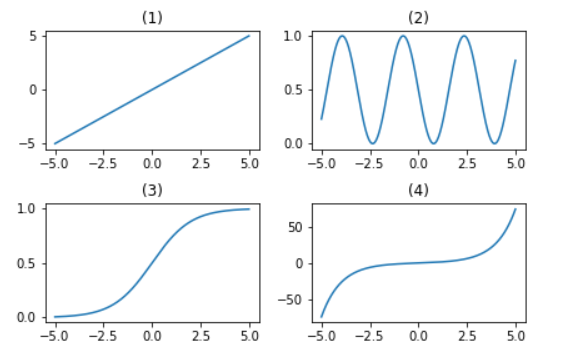

- 1 [no - Look at the y-axis labels. Remember that probabilities are between 0 and 1.]

- 2 [no - A sensible transform should increase steadily, rather than oscillating, so that a higher raw model output always means a higher probability.]

- 3 [yes - The function in the picture is fairly similar to the logistic function used by logistic regression.]

- 4 [no - Look at the y-axis labels. Remember that probabilities are between 0 and 1.]

**Regularization and probabilities**  
In this exercise, you will observe the effects of changing the regularization strength on the predicted probabilities.

A 2D binary classification dataset is already loaded into the environment as X and y.

In [18]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
        """Plot the decision boundaries for a classifier.

        Parameters
        ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
        """
        if proba:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
            Z = Z.reshape(xx.shape)
            out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
            ax.contour(xx, yy, Z, levels=[0.5])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            out = ax.contourf(xx, yy, Z, **params)
        return out


def make_meshgrid(x, y, h=.02, lims=None):
        """Create a mesh of points to plot in

        Parameters
        ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

        Returns
        -------
        xx, yy : ndarray
        """

        if lims is None:
            x_min, x_max = x.min() - 1, x.max() + 1
            y_min, y_max = y.min() - 1, y.max() + 1
        else:
            x_min, x_max, y_min, y_max = lims
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return xx, yy

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
        X0, X1 = X[:, 0], X[:, 1]
        xx, yy = make_meshgrid(X0, X1, lims=lims)

        if ax is None:
            plt.figure()
            ax = plt.gca()
            show = True
        else:
            show = False

        # can abstract some of this into a higher-level function for learners to call
        cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
        if proba:
            cbar = plt.colorbar(cs)
            cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
            cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
        labels = np.unique(y)
        if len(labels) == 2:
            ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
            ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
        else:
            ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
        if ticks:
            ax.set_xticks(())
            ax.set_yticks(())
    #     ax.set_title(title)
        if show:
            plt.show()
        else:
            return ax


def plot_4_classifiers(X, y, clfs):

        # Set-up 2x2 grid for plotting.
        fig, sub = plt.subplots(2, 2)
        plt.subplots_adjust(wspace=0.2, hspace=0.2)

        for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
            # clf.fit(X, y)
            plot_classifier(X, y, clf, ax, ticks=True)
            ax.set_title(title)
        plt.show()

/tmp/ipython-input-18-3495182117.py:67: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
/tmp/ipython-input-18-3495182117.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')


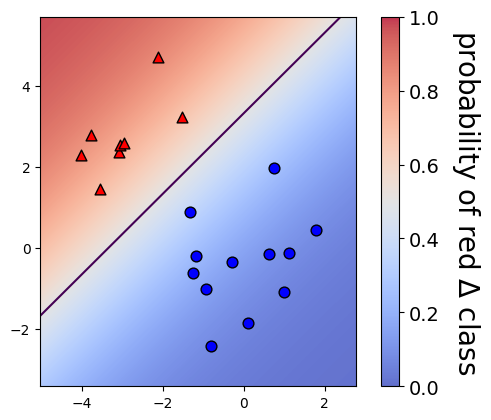

Maximum predicted probability 0.9351932155190785


In [19]:
X = [[1.7886284734303186, 0.43650985051198943], [0.09649746807200862, -1.8634927033644908], [-0.27738820251439905, -0.35475897926898675], [-3.0827414814824596, 2.3729993231761526], [-3.0438181689759283, 2.5227819696404974], [-1.3138647533626822, 0.8846223804995846], [-2.1186819577924703, 4.7095730636529485], [-2.94996635782314, 2.595322585399109], [-3.5453599476195303, 1.4535226844170317], [0.9823674342581601, -1.1010676301114757], [-1.1850465270201729, -0.20564989942254108], [-1.5138516449254098, 3.2367162672269125], [-4.023785139926468, 2.2870067998879504], [0.6252449661628293, -0.1605133631869239], [-3.76883635031923, 2.769969277722061], [0.7450562664053708, 1.9761107831263025], [-1.244123328955937, -0.6264169111883692], [-0.8037660945765764, -2.4190831731786697], [-0.9237920216957886, -1.0238757608428377], [1.1239779589574683, -0.1319142328009009]]
y = [-1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

# As you probably noticed, smaller values of C lead to less confident predictions.
# That's because smaller C means more regularization, which in turn means smaller
# coefficients, which means raw model outputs closer to zero and, thus, probabilities
# closer to 0.5 after the raw model output is squashed through the sigmoid function.
# That's quite a chain of events!

**Visualizing easy and difficult examples**   
In this exercise, you'll visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

The handwritten digits dataset is already loaded into the variables X and y. The show_digit function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.

In [20]:
def show_digit(index, model):
    """
    Displays a digit image and its predicted probability.

    Args:
        index (int): The index of the digit to display.
        model: The trained logistic regression model.
    """
    plt.imshow(X[index].reshape(8, 8), cmap='gray')
    prob = model.predict_proba(X[index].reshape(1, -1))[0]
    print(f"Predicted probabilities: {prob}")
    print(f"Predicted class: {model.predict(X[index].reshape(1, -1))[0]}")
    plt.title(f"Digit at index {index}")
    plt.show()